set up basics

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

import matplotlib.pyplot as plt

import pylab as pl

%matplotlib inline


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values



# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!pip install folium
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


Collect Covid Data from https://coronavirus-staging.data.gov.uk/developers-guide

In [76]:
from requests import get


def get_data(url):
    response = get(endpoint, timeout=10)
    
    if response.status_code >= 400:
        raise RuntimeError(f'Request failed: { response.text }')
        
    return response.json()
    

if __name__ == '__main__':
    endpoint = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=ltla; date=2020-07-01&'
        'structure={"date":"date","CumCases":"cumCasesBySpecimenDate", "areaName":"areaName", "areaCode":"areaCode"}'
    )
    
    data = get_data(endpoint)
    data=json_normalize(data, 'data')
    
cvDf=pd.DataFrame(data)
    
cvDf
    

,CumCases,areaCode,areaName,date
0,184,E07000223,Adur,2020-07-01
1,342,E07000026,Allerdale,2020-07-01
2,431,E07000032,Amber Valley,2020-07-01
3,319,E07000224,Arun,2020-07-01
4,560,E07000170,Ashfield,2020-07-01
5,1269,E07000105,Ashford,2020-07-01
6,759,E07000004,Aylesbury Vale,2020-07-01
7,259,E07000200,Babergh,2020-07-01
8,708,E09000002,Barking and Dagenham,2020-07-01
9,1585,E09000003,Barnet,2020-07-01


For each region get rate

In [3]:


endpoint = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=ltla&areaName=bradford&'
        'structure={"date":"date","newCases":"newCasesBySpecimenDate"}'
    )
    
data = get_data(endpoint)
data=json_normalize(data, 'data')
   
df_rates=pd.DataFrame(data)
    
df_rates

,date,newCases
0,2020-08-04,0
1,2020-08-03,0
2,2020-08-02,0
3,2020-08-01,0
4,2020-07-31,0
5,2020-07-30,0
6,2020-07-29,0
7,2020-07-28,0
8,2020-07-27,0
9,2020-07-26,0


In [4]:
#get rolling average
df_rates['rolling7'] = df_rates.iloc[:,1].rolling(window=7).mean()

#add day numbers
df_rates['days_from_start'] = (df_rates.index - df_rates.index[0]); df_rates

df_rates

,date,newCases,rolling7,days_from_start
0,2020-08-04,0,NaN,0
1,2020-08-03,0,NaN,1
2,2020-08-02,0,NaN,2
3,2020-08-01,0,NaN,3
4,2020-07-31,0,NaN,4
5,2020-07-30,0,NaN,5
6,2020-07-29,0,0.000000,6
7,2020-07-28,0,0.000000,7
8,2020-07-27,0,0.000000,8
9,2020-07-26,0,0.000000,9


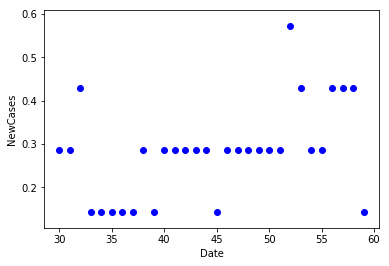

In [5]:
plt.scatter(df_rates.iloc[30:60].days_from_start, df_rates.iloc[30:60].rolling7,  color='blue')
plt.xlabel("Date")
plt.ylabel("NewCases")
plt.show()

get line

In [6]:
df_sub=df_rates[30:60]

In [7]:
from sklearn import linear_model
x=df_sub[['days_from_start']]
y=df_sub['rolling7']
regr = linear_model.LinearRegression()

regr.fit (x,y)
# The coefficients
slope=regr.coef_
print(slope)

[0.00549817]


In [8]:
def getCVrate(LA):
    
    endpoint = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=ltla&areaName=' +  LA +'&'
        'structure={"date":"date","newCases":"newCasesBySpecimenDate"}'
    )

    
    indata = get_data(endpoint)
    indata=json_normalize(indata, 'data')
   
    df_r=pd.DataFrame(indata)

 
    #get rolling average
    df_r['rolling7'] = df_r.iloc[:,1].rolling(window=7).mean()

#add day numbers
    df_r['days_from_start'] = (df_r.index - df_r.index[0]); df_rates
    df_s=df_r[30:60]
    inx=df_s[['days_from_start']]
    iny=df_s['rolling7']
    regr = linear_model.LinearRegression()

    regr.fit (inx,iny)
# The coefficients
    slope=regr.coef_

    return slope
    #return df_r.shape

In [9]:
def getend(LA):
    
    endpoint = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=ltla&areaName=' +  LA +'&'
        'structure={"date":"date","newCases":"newCasesBySpecimenDate"}'
    )
    return endpoint

In [10]:
print(getCVrate('bradford'))

[0.00549817]


In [11]:
#cvDf['rate'] =cvDf.apply(lambda x: getCVrate(cvDf['areaName']) ,axis=1)
#cvDf.head()

In [77]:
cvDf

,CumCases,areaCode,areaName,date
0,184,E07000223,Adur,2020-07-01
1,342,E07000026,Allerdale,2020-07-01
2,431,E07000032,Amber Valley,2020-07-01
3,319,E07000224,Arun,2020-07-01
4,560,E07000170,Ashfield,2020-07-01
5,1269,E07000105,Ashford,2020-07-01
6,759,E07000004,Aylesbury Vale,2020-07-01
7,259,E07000200,Babergh,2020-07-01
8,708,E09000002,Barking and Dagenham,2020-07-01
9,1585,E09000003,Barnet,2020-07-01


In [74]:
# The code was removed by Watson Studio for sharing.

,Code,Name,population
0,K02000001,UNITED KINGDOM,"66,796,807"
1,K03000001,GREAT BRITAIN,"64,903,140"
2,K04000001,ENGLAND AND WALES,"59,439,840"
3,E92000001,ENGLAND,"56,286,961"
4,E12000001,NORTH EAST,"2,669,941"


In [79]:
cvDf.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
307    False
308    False
309    False
310    False
311    False
312    False
313    False
314    False
315    False
316    False
317    False
318    False
319    False
320    False
321    False
322    False
323    False
324    False
325    False
326    False
327    False
328    False
329    False
330    False
331    False
332    False
333    False
334    False
335    False
336    False
Length: 337, dtype: bool

In [78]:
cvDf.merge(df_data_1, left_on ='Code', right_on='areaCode')
cvDf

KeyError: 'areaCode'

Collect FourSquare checkins

In [13]:
CLIENT_ID = 'QHFYHL0PYGPG5MUIZTZS4TIL3JEFNAWBHZOAYMJJBESEY5BC' # your Foursquare ID
CLIENT_SECRET = 'XQVLUQDL5AMFU2IZS2O5KD1WYUPL2BUTHGIDMSJREAUHZ5IX' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 110
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QHFYHL0PYGPG5MUIZTZS4TIL3JEFNAWBHZOAYMJJBESEY5BC
CLIENT_SECRET:XQVLUQDL5AMFU2IZS2O5KD1WYUPL2BUTHGIDMSJREAUHZ5IX


In [14]:
#get venues by post code by UK

near="MK1"
lat=51.518068
lng=--0.092348
radius=15000
LIMIT=50
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['groups'][0]['items']
#results=pd.read_json(url, orient='columns')

results

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '55a8d0fc498eac366c5845c6',
   'name': 'Greenwich Peninsula Golf Driving Range',
   'location': {'address': '256 Tunnel Ave',
    'crossStreet': 'Peninsula Sq',
    'lat': 51.498099017425396,
    'lng': 0.0002422974054891656,
    'labeledLatLngs': [{'label': 'display',
      'lat': 51.498099017425396,
      'lng': 0.0002422974054891656}],
    'distance': 6757,
    'postalCode': 'SE10 0QE',
    'cc': 'GB',
    'city': 'Greenwich',
    'state': 'Greater London',
    'country': 'United Kingdom',
    'formattedAddress': ['256 Tunnel Ave (Peninsula Sq)',
     'Greenwich',
     'Greater London',
     'SE10 0QE',
     'United Kingdom']},
   'categories': [{'id': '58daa1558bbb0b01f18ec1b0',
     'name': 'Golf Driving Range',
     'pluralName': 'Golf Driving Ranges',
     'shortName': 'Golf Driving Range',
     'icon': {'prefix': '

group catagories - bar, pub, restaurant, outside etc

In [15]:
def getNearbyVenues(name, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(name, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
             name, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['name','venue','id','Category']
    
    return(nearby_venues)

http://geoportal.statistics.gov.uk/datasets/ae90afc385c04d869bc8cf8890bd1bcd_1/data?page=9

In [16]:
LA_URL="https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/Local_Authority_Districts_April_2019_UK_BFC_v2/FeatureServer/0/query?where=1%3D1&outFields=OBJECTID,LAD19CD,LAD19NM,LONG,LAT&returnGeometry=false&outSR=4326&f=json"
LA=requests.get(LA_URL).json()['features']


In [17]:
L=json_normalize(LA)
LaDf=pd.DataFrame(L)
LaDf.columns=['LAID', 'Name', 'Latitude', 'Longitude', 'obj']
del LaDf['obj']
LaDf

,LAID,Name,Latitude,Longitude
0,E06000001,Hartlepool,54.6762,-1.27023
1,E06000002,Middlesbrough,54.5447,-1.21099
2,E06000003,Redcar and Cleveland,54.5675,-1.00611
3,E06000004,Stockton-on-Tees,54.5569,-1.30669
4,E06000005,Darlington,54.5353,-1.56835
5,E06000006,Halton,53.3342,-2.68853
6,E06000007,Warrington,53.3916,-2.56167
7,E06000008,Blackburn with Darwen,53.7008,-2.46360
8,E06000009,Blackpool,53.8216,-3.02284
9,E06000010,"Kingston upon Hull, City of",53.7698,-0.30380


In [18]:
#needs to come from ONS data
#LAvenues = getNearbyVenues(name = LaDf['Name'],
#                            latitudes=LaDf['Latitude'],
#                           longitudes=LaDf['Longitude']
#                                  )

In [19]:
cat_url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
          )
cats=requests.get(cat_url).json()["response"]

cats

{'categories': [{'id': '4d4b7104d754a06370d81259',
   'name': 'Arts & Entertainment',
   'pluralName': 'Arts & Entertainment',
   'shortName': 'Arts & Entertainment',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
    'suffix': '.png'},
   'categories': [{'id': '56aa371be4b08b9a8d5734db',
     'name': 'Amphitheater',
     'pluralName': 'Amphitheaters',
     'shortName': 'Amphitheater',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
      'suffix': '.png'},
     'categories': []},
    {'id': '4fceea171983d5d06c3e9823',
     'name': 'Aquarium',
     'pluralName': 'Aquariums',
     'shortName': 'Aquarium',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
      'suffix': '.png'},
     'categories': []},
    {'id': '4bf58dd8d48988d1e1931735',
     'name': 'Arcade',
     'pluralName': 'Arcades',
     'shortName': 'Arcade',
     'icon': {'prefix': 'https://

In [20]:
catData=json_normalize(cats, record_path=['categories'], record_prefix='sub.', meta_prefix='top.', sep="." )
    
catData




,sub.categories,sub.icon,sub.id,sub.name,sub.pluralName,sub.shortName
0,"[{'id': '56aa371be4b08b9a8d5734db', 'name': 'A...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment
1,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06372d81259,College & University,Colleges & Universities,College & Education
2,"[{'id': '52f2ab2ebcbc57f1066b8b3b', 'name': 'C...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06373d81259,Event,Events,Event
3,"[{'id': '503288ae91d4c4b30a586d67', 'name': 'A...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06374d81259,Food,Food,Food
4,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06376d81259,Nightlife Spot,Nightlife Spots,Nightlife
5,"[{'id': '4f4528bc4b90abdf24c9de85', 'name': 'A...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06377d81259,Outdoors & Recreation,Outdoors & Recreation,Outdoors & Recreation
6,"[{'id': '4e52d2d203646f7c19daa8ae', 'name': 'A...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06375d81259,Professional & Other Places,Professional & Other Places,Professional
7,"[{'id': '5032891291d4c4b30a586d68', 'name': 'A...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4e67e38e036454776db1fb3a,Residence,Residences,Residence
8,"[{'id': '52f2ab2ebcbc57f1066b8b56', 'name': 'A...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06378d81259,Shop & Service,Shops & Services,Shops
9,"[{'id': '4bf58dd8d48988d1ed931735', 'name': 'A...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06379d81259,Travel & Transport,Travel & Transport,Travel


In [21]:
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [22]:
c=explode(catData, 'sub.categories')


In [23]:
#replace sub category with just the name field
c['sub.categories']=[a.get('shortName')for a in c['sub.categories']]


In [24]:
c


,sub.icon,sub.id,sub.name,sub.pluralName,sub.shortName,sub.categories
0,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Amphitheater
1,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Aquarium
2,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Arcade
3,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Art Gallery
4,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Bowling Alley
5,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Casino
6,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Circus
7,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Comedy Club
8,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Concert Hall
9,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Country Dance Club


Load ONS centro

In [25]:
df=pd.read_csv("https://opendata.arcgis.com/datasets/6e1623c58c054504a1dbb79f462af58c_0.csv?outSR=%7B%22latestWkid%22%3A27700%2C%22wkid%22%3A27700%7D")

In [26]:
df.rename(columns={'msoa01nm':'LaName'}, inplace=True)
df

,X,Y,objectid,msoa01cd,LaName
0,532458,181630,1,E02000001,City of London 001
1,547997,189392,2,E02000002,Barking and Dagenham 001
2,548377,188094,3,E02000003,Barking and Dagenham 002
3,550921,186823,4,E02000004,Barking and Dagenham 003
4,548707,186820,5,E02000005,Barking and Dagenham 004
5,547479,186772,6,E02000006,Barking and Dagenham 005
6,549505,186345,7,E02000007,Barking and Dagenham 006
7,548122,185915,8,E02000008,Barking and Dagenham 007
8,547044,185774,9,E02000009,Barking and Dagenham 008
9,549104,185355,10,E02000010,Barking and Dagenham 009


convert BGS coordinates to longitude and latititude

In [27]:
!pip install bng_latlon

In [28]:
from bng_to_latlon import OSGB36toWGS84

df['lat'], df['long']=zip(*df.apply(lambda x:OSGB36toWGS84(x['X'], x['Y']),axis=1))



In [29]:
df.rename(columns={'msoa01nm':'LaName'} , inplace=True )

In [30]:
df.head()

,X,Y,objectid,msoa01cd,LaName,lat,long
0,532458,181630,1,E02000001,City of London 001,51.518068,-0.092348
1,547997,189392,2,E02000002,Barking and Dagenham 001,51.583957,0.134711
2,548377,188094,3,E02000003,Barking and Dagenham 002,51.572195,0.139644
3,550921,186823,4,E02000004,Barking and Dagenham 003,51.560101,0.175780
4,548707,186820,5,E02000005,Barking and Dagenham 004,51.560661,0.143864


In [31]:
df['LaName']=df['LaName'].str.replace("[0-9()]+$", "")

In [32]:
df


,X,Y,objectid,msoa01cd,LaName,lat,long
0,532458,181630,1,E02000001,City of London,51.518068,-0.092348
1,547997,189392,2,E02000002,Barking and Dagenham,51.583957,0.134711
2,548377,188094,3,E02000003,Barking and Dagenham,51.572195,0.139644
3,550921,186823,4,E02000004,Barking and Dagenham,51.560101,0.175780
4,548707,186820,5,E02000005,Barking and Dagenham,51.560661,0.143864
5,547479,186772,6,E02000006,Barking and Dagenham,51.560552,0.126142
6,549505,186345,7,E02000007,Barking and Dagenham,51.556182,0.155165
7,548122,185915,8,E02000008,Barking and Dagenham,51.552683,0.135050
8,547044,185774,9,E02000009,Barking and Dagenham,51.551698,0.119454
9,549104,185355,10,E02000010,Barking and Dagenham,51.547393,0.148966


In [33]:
df.tail(2000)



,X,Y,objectid,msoa01cd,LaName,lat,long
5194,349189,418081,5195,E02005195,Chorley,53.656740,-2.770303
5195,357484,418080,5196,E02005196,Chorley,53.657473,-2.644799
5196,359204,417540,5197,E02005197,Chorley,53.652757,-2.618704
5197,358465,416665,5198,E02005198,Chorley,53.644834,-2.629767
5198,353030,416306,5199,E02005199,Chorley,53.641147,-2.711920
5199,357743,416207,5200,E02005200,Chorley,53.640660,-2.640625
5200,356384,414161,5201,E02005201,Chorley,53.622159,-2.660892
5201,360273,413618,5202,E02005202,Chorley,53.617589,-2.602029
5202,337596,436563,5203,E02005203,Fylde,53.821577,-2.949431
5203,341819,432320,5204,E02005204,Fylde,53.783936,-2.884487


limitnumber of calls by limiting to the first n LAs as it goes over the foursquare daily limit

In [34]:
df_ltd=df.tail(2000)

In [35]:
#

In [36]:
#

join df_venues and Cv data


In [37]:
df_ltd=df.tail(1000)
df_ltd

,X,Y,objectid,msoa01cd,LaName,lat,long
6194,399922,324039,6195,E02006195,Stafford,52.813894,-2.002599
6195,393149,323763,6196,E02006196,Stafford,52.811368,-2.103082
6196,392280,323617,6197,E02006197,Stafford,52.810043,-2.115970
6197,394390,323129,6198,E02006198,Stafford,52.805683,-2.084659
6198,390518,322340,6199,E02006199,Stafford,52.798535,-2.142073
6199,391443,321301,6200,E02006200,Stafford,52.789211,-2.128326
6200,394934,321038,6201,E02006201,Stafford,52.786891,-2.076557
6201,382569,320880,6202,E02006202,Stafford,52.785211,-2.259889
6202,392702,320801,6203,E02006203,Stafford,52.784735,-2.109646
6203,399600,358346,6204,E02006204,Staffordshire Moorlands,53.122286,-2.007431


In [38]:
test=getNearbyVenues(name=df_ltd['LaName'],latitudes=df_ltd['lat'], longitudes=df_ltd['long'])

Stafford 
Stafford 
Stafford 
Stafford 
Stafford 
Stafford 
Stafford 
Stafford 
Stafford 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Tamworth 
Tamworth 
Tamworth 
Tamworth 
Tamworth 
Tamworth 
Tamworth 
Tamworth 
Tamworth 
Tamworth 
Babergh 
Babergh 
Babergh 
Babergh 
Babergh 
Babergh 
Babergh 
Babergh 
Babergh 
Babergh 
Babergh 
Forest Heath 
Forest Heath 
Forest Heath 
Forest Heath 
Forest Heath 
Forest Heath 
Forest Heath 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Mid Suffolk 
Mid Suffolk 
Mid Suffolk 
Mid Suffolk 
Mid Suffolk 
Mid Suffolk 
Mid Suffolk 
Mid Suffolk 
Mid Suffolk 
Mid Suffolk 
Mid Suffolk 
M

In [39]:
test


,name,venue,id,Category
0,Stafford,Farm Shop Great Haywood,4e7f0f6fb8f73d7ceb9d1602,Food & Drink Shop
1,Stafford,Canalside Cafe,53ca6f98498e5c3c5e54a0c4,Café
2,Stafford,Enchanted Designs,58873beaf5bfab21f9f94402,Flower Shop
3,Stafford,Great Haywood Lock,4fe07c63e4b09fe52758888f,Canal Lock
4,Stafford,Clifford Arms,4c06b96bb4aa0f47028f6462,Gastropub
5,Stafford,Lock House Tea Room,4bee980be24d20a11f117314,Tea Room
6,Stafford,The Sun Inn,4c555bc3f5f3d13a4050a2fb,Pub
7,Stafford,Stafford Gatehouse Theatre,4b641a90f964a5202d9f2ae3,Theater
8,Stafford,The Market Vaults,4b9c229df964a520a24d36e3,Pub
9,Stafford,The Soup Kitchen,4c516e4bd797e21e611a047c,Café


In [40]:
test.shape

(16428, 4)

In [41]:
test.drop_duplicates()
test.shape

(16428, 4)

In [42]:
type(test)

pandas.core.frame.DataFrame

In [43]:
sum_df=test.groupby(['name', 'Category']) ['Category'].count()
sum_df


name          Category                  
Adur          Airport                        2
              Airport Terminal               1
              Athletics & Sports             3
              Beach                          4
              Burger Joint                   1
              Bus Station                    1
              Bus Stop                       2
              Café                           8
              Chinese Restaurant             3
              Coffee Shop                    8
              Construction & Landscaping     3
              Convenience Store              2
              Department Store               3
              English Restaurant             4
              Farmers Market                 2
              Fast Food Restaurant           4
              Furniture / Home Store         4
              Garden Center                  1
              Go Kart Track                  2
              Grocery Store                 20
              Gym  

In [44]:
df_Venues=pd.merge(test, c, left_on ='Category', right_on='sub.categories', how='left')
sumdf=df_Venues.groupby(['name','sub.shortName']) ['sub.shortName'].count()

In [45]:
df_Venues

,name,venue,id,Category,sub.icon,sub.id,sub.name,sub.pluralName,sub.shortName,sub.categories
0,Stafford,Farm Shop Great Haywood,4e7f0f6fb8f73d7ceb9d1602,Food & Drink Shop,NaN,NaN,NaN,NaN,NaN,NaN
1,Stafford,Canalside Cafe,53ca6f98498e5c3c5e54a0c4,Café,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06374d81259,Food,Food,Food,Café
2,Stafford,Enchanted Designs,58873beaf5bfab21f9f94402,Flower Shop,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06378d81259,Shop & Service,Shops & Services,Shops,Flower Shop
3,Stafford,Great Haywood Lock,4fe07c63e4b09fe52758888f,Canal Lock,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06377d81259,Outdoors & Recreation,Outdoors & Recreation,Outdoors & Recreation,Canal Lock
4,Stafford,Clifford Arms,4c06b96bb4aa0f47028f6462,Gastropub,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06374d81259,Food,Food,Food,Gastropub
5,Stafford,Lock House Tea Room,4bee980be24d20a11f117314,Tea Room,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06374d81259,Food,Food,Food,Tea Room
6,Stafford,The Sun Inn,4c555bc3f5f3d13a4050a2fb,Pub,NaN,NaN,NaN,NaN,NaN,NaN
7,Stafford,Stafford Gatehouse Theatre,4b641a90f964a5202d9f2ae3,Theater,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06372d81259,College & University,Colleges & Universities,College & Education,Theater
8,Stafford,The Market Vaults,4b9c229df964a520a24d36e3,Pub,NaN,NaN,NaN,NaN,NaN,NaN
9,Stafford,The Soup Kitchen,4c516e4bd797e21e611a047c,Café,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06374d81259,Food,Food,Food,Café


In [46]:
type(sum_df)

pandas.core.series.Series

In [47]:
sum_df.head()

name   Category          
Adur   Airport               2
       Airport Terminal      1
       Athletics & Sports    3
       Beach                 4
       Burger Joint          1
Name: Category, dtype: int64

In [48]:
sum_df.rename(columns={'sub.shortName':'category'} ,inplace=True )
sum_df

name          Category                  
Adur          Airport                        2
              Airport Terminal               1
              Athletics & Sports             3
              Beach                          4
              Burger Joint                   1
              Bus Station                    1
              Bus Stop                       2
              Café                           8
              Chinese Restaurant             3
              Coffee Shop                    8
              Construction & Landscaping     3
              Convenience Store              2
              Department Store               3
              English Restaurant             4
              Farmers Market                 2
              Fast Food Restaurant           4
              Furniture / Home Store         4
              Garden Center                  1
              Go Kart Track                  2
              Grocery Store                 20
              Gym  

start doing some analysis....

one hot coding of venue data


In [49]:
# one hot encoding
LA_onehot = pd.get_dummies(df_Venues[['sub.name']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
LA_onehot['name'] = df_Venues['name'] 

# move neighborhood column to the first column
fixed_columns = [LA_onehot.columns[-1]] + list(LA_onehot.columns[:-1])
LA_onehot = LA_onehot[fixed_columns]

LA_onehot.head()

,name,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Stafford,0,0,0,0,0,0,0,0,0,0
1,Stafford,0,0,0,1,0,0,0,0,0,0
2,Stafford,0,0,0,0,0,0,0,0,1,0
3,Stafford,0,0,0,0,0,1,0,0,0,0
4,Stafford,0,0,0,1,0,0,0,0,0,0


In [50]:
LA_onehot.shape

(16469, 11)

In [51]:
LA_grouped = LA_onehot.groupby('name').mean().reset_index()
LA_grouped['name']=LA_grouped['name'].str.strip()
LA_grouped


,name,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Adur,0.011628,0.040698,0.000000,0.151163,0.000000,0.127907,0.005814,0.000000,0.069767,0.069767
1,Arun,0.027500,0.005000,0.000000,0.145000,0.015000,0.102500,0.007500,0.000000,0.087500,0.062500
2,Babergh,0.013514,0.000000,0.000000,0.094595,0.000000,0.040541,0.000000,0.000000,0.162162,0.067568
3,Blaenau Gwent,0.020408,0.000000,0.000000,0.081633,0.000000,0.061224,0.020408,0.000000,0.122449,0.061224
4,Bridgend,0.006645,0.023256,0.000000,0.139535,0.036545,0.049834,0.000000,0.000000,0.132890,0.086379
5,Bromsgrove,0.021622,0.000000,0.000000,0.129730,0.027027,0.037838,0.000000,0.000000,0.162162,0.086486
6,Caerphilly,0.000000,0.009709,0.000000,0.077670,0.004854,0.067961,0.000000,0.000000,0.106796,0.082524
7,Cardiff,0.015262,0.015262,0.000000,0.175846,0.019907,0.062376,0.003318,0.000000,0.088918,0.043132
8,Carmarthenshire,0.037879,0.007576,0.000000,0.102273,0.000000,0.071970,0.000000,0.003788,0.147727,0.087121
9,Ceredigion,0.027778,0.018519,0.000000,0.129630,0.055556,0.074074,0.018519,0.000000,0.111111,0.027778


In [52]:
LA_grouped.set_index('name')

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
name,,,,,,,,,,
Adur,0.011628,0.040698,0.000000,0.151163,0.000000,0.127907,0.005814,0.000000,0.069767,0.069767
Arun,0.027500,0.005000,0.000000,0.145000,0.015000,0.102500,0.007500,0.000000,0.087500,0.062500
Babergh,0.013514,0.000000,0.000000,0.094595,0.000000,0.040541,0.000000,0.000000,0.162162,0.067568
Blaenau Gwent,0.020408,0.000000,0.000000,0.081633,0.000000,0.061224,0.020408,0.000000,0.122449,0.061224
Bridgend,0.006645,0.023256,0.000000,0.139535,0.036545,0.049834,0.000000,0.000000,0.132890,0.086379
Bromsgrove,0.021622,0.000000,0.000000,0.129730,0.027027,0.037838,0.000000,0.000000,0.162162,0.086486
Caerphilly,0.000000,0.009709,0.000000,0.077670,0.004854,0.067961,0.000000,0.000000,0.106796,0.082524
Cardiff,0.015262,0.015262,0.000000,0.175846,0.019907,0.062376,0.003318,0.000000,0.088918,0.043132
Carmarthenshire,0.037879,0.007576,0.000000,0.102273,0.000000,0.071970,0.000000,0.003788,0.147727,0.087121


In [53]:
cvDf.rename(columns={ 'areaName':'name'}, inplace=True)
cvDf.set_index('name')

,CumCases,date
name,,
Adur,184,2020-07-01
Allerdale,342,2020-07-01
Amber Valley,431,2020-07-01
Arun,319,2020-07-01
Ashfield,560,2020-07-01
Ashford,1269,2020-07-01
Aylesbury Vale,759,2020-07-01
Babergh,259,2020-07-01
Barking and Dagenham,708,2020-07-01


In [54]:
LA_grouped['name'][0]

'Adur'

In [55]:
df=LA_grouped.merge(cvDf,on='name')


In [56]:
df.head()


,name,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,CumCases,date
0,Adur,0.011628,0.040698,0.0,0.151163,0.000000,0.127907,0.005814,0.0,0.069767,0.069767,184,2020-07-01
1,Arun,0.027500,0.005000,0.0,0.145000,0.015000,0.102500,0.007500,0.0,0.087500,0.062500,319,2020-07-01
2,Babergh,0.013514,0.000000,0.0,0.094595,0.000000,0.040541,0.000000,0.0,0.162162,0.067568,259,2020-07-01
3,Blaenau Gwent,0.020408,0.000000,0.0,0.081633,0.000000,0.061224,0.020408,0.0,0.122449,0.061224,361,2020-07-01
4,Bridgend,0.006645,0.023256,0.0,0.139535,0.036545,0.049834,0.000000,0.0,0.132890,0.086379,559,2020-07-01


Cluster?

In [57]:
#normalise the CumCases on 0-1 basis
df['CumCases']=df['CumCases']/df['CumCases'].max()

In [58]:
cdf = df[['Food','Nightlife Spot','CumCases']]
cdf.rename(columns={ 'Nightlife Spot':'Nightlife', 'CumCases':'Cases'}, inplace=True)
cdf.head(9)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Food,Nightlife,Cases
0,0.151163,0.000000,0.080666
1,0.145000,0.015000,0.139851
2,0.094595,0.000000,0.113547
3,0.081633,0.000000,0.158264
4,0.139535,0.036545,0.245068
5,0.129730,0.027027,0.228847
6,0.077670,0.004854,0.320912
7,0.175846,0.019907,1.000000
8,0.102273,0.000000,0.348970


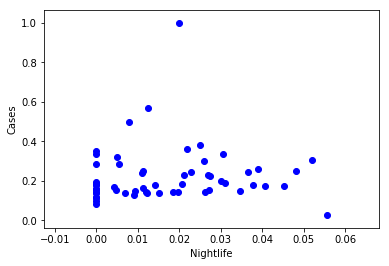

In [59]:
plt.scatter(cdf.Nightlife, cdf.Cases,  color='blue')
plt.xlabel("Nightlife")
plt.ylabel("Cases")
plt.show()

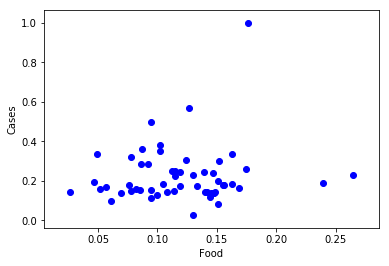

In [60]:
plt.scatter(cdf.Food, cdf.Cases,  color='blue')
plt.xlabel("Food")
plt.ylabel("Cases")
plt.show()

In [61]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [62]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Food','Nightlife']])
y = np.asanyarray(train[['Cases']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-0.30745592  0.40661556]]


In [63]:
y_hat= regr.predict(test[['Food','Nightlife']])
x = np.asanyarray(test[['Food','Nightlife']])
y = np.asanyarray(test[['Cases']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.08
Variance score: -0.11


In [64]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

LA_clustering = cdf

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LA_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 2, 2, 4, 3, 4, 0], dtype=int32)

In [65]:
# add clustering labels
df.insert(0, 'ClusterLabels', kmeans.labels_)

df

,ClusterLabels,name,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,CumCases,date
0,0,Adur,0.011628,0.040698,0.000000,0.151163,0.000000,0.127907,0.005814,0.000000,0.069767,0.069767,0.080666,2020-07-01
1,0,Arun,0.027500,0.005000,0.000000,0.145000,0.015000,0.102500,0.007500,0.000000,0.087500,0.062500,0.139851,2020-07-01
2,0,Babergh,0.013514,0.000000,0.000000,0.094595,0.000000,0.040541,0.000000,0.000000,0.162162,0.067568,0.113547,2020-07-01
3,0,Blaenau Gwent,0.020408,0.000000,0.000000,0.081633,0.000000,0.061224,0.020408,0.000000,0.122449,0.061224,0.158264,2020-07-01
4,2,Bridgend,0.006645,0.023256,0.000000,0.139535,0.036545,0.049834,0.000000,0.000000,0.132890,0.086379,0.245068,2020-07-01
5,2,Bromsgrove,0.021622,0.000000,0.000000,0.129730,0.027027,0.037838,0.000000,0.000000,0.162162,0.086486,0.228847,2020-07-01
6,4,Caerphilly,0.000000,0.009709,0.000000,0.077670,0.004854,0.067961,0.000000,0.000000,0.106796,0.082524,0.320912,2020-07-01
7,3,Cardiff,0.015262,0.015262,0.000000,0.175846,0.019907,0.062376,0.003318,0.000000,0.088918,0.043132,1.000000,2020-07-01
8,4,Carmarthenshire,0.037879,0.007576,0.000000,0.102273,0.000000,0.071970,0.000000,0.003788,0.147727,0.087121,0.348970,2020-07-01
9,0,Ceredigion,0.027778,0.018519,0.000000,0.129630,0.055556,0.074074,0.018519,0.000000,0.111111,0.027778,0.025866,2020-07-01


In [66]:
pdf = df[['ClusterLabels','Food','Nightlife Spot','CumCases']]
pdf.rename(columns={ 'Nightlife Spot':'Nightlife', 'CumCases':'Cases'}, inplace=True)
pdf.head(9)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,ClusterLabels,Food,Nightlife,Cases
0,0,0.151163,0.000000,0.080666
1,0,0.145000,0.015000,0.139851
2,0,0.094595,0.000000,0.113547
3,0,0.081633,0.000000,0.158264
4,2,0.139535,0.036545,0.245068
5,2,0.129730,0.027027,0.228847
6,4,0.077670,0.004854,0.320912
7,3,0.175846,0.019907,1.000000
8,4,0.102273,0.000000,0.348970


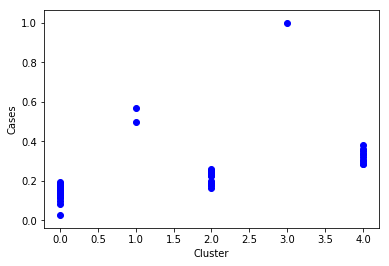

In [67]:
plt.scatter(pdf.ClusterLabels, pdf.Cases,  color='blue')
plt.xlabel("Cluster")
plt.ylabel("Cases")
plt.show()

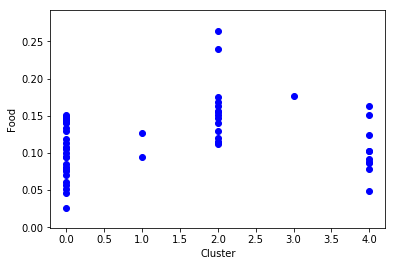

In [68]:
plt.scatter(pdf.ClusterLabels, pdf.Food,  color='blue')
plt.xlabel("Cluster")
plt.ylabel("Food")
plt.show()

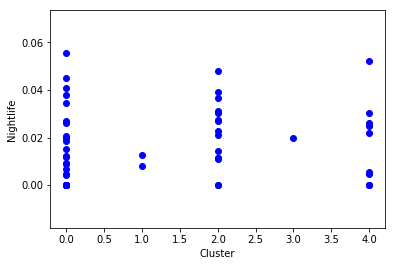

In [69]:
plt.scatter(pdf.ClusterLabels, pdf.Nightlife,  color='blue')
plt.xlabel("Cluster")
plt.ylabel("Nightlife")
plt.show()

In [72]:
df.loc[df['ClusterLabels'] ==3,df.columns[[1] + list(range(5, df.shape[1]))]]

,name,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,CumCases,date
7,Cardiff,0.175846,0.019907,0.062376,0.003318,0.0,0.088918,0.043132,1.0,2020-07-01
